In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

crime_df = pd.read_csv('US_Crime_Rates_1960_2014.csv')

The "1960_2014 Crimes Data" dataset contains information about reported crimes in US through the year 1960_2014. This dataset aims to provide insights into crime trends,murder,population,patterns, and rates for analysis and predictive modeling. The data can be used for exploratory data analysis (EDA), trend identification, and forecasting future crime activities and rates. The dataset is particularly valuable for law enforcement agencies, researchers, and analysts interested in understanding crime dynamics.

Usage:
This dataset is suitable for a wide range of analyses, including exploratory data analysis, trend visualization, and predictive modeling. Analysts and researchers can use this data to uncover crime patterns in US, identify hotspots, and develop models for predicting crime rates in upcoming years. Law enforcement agencies, such as the FBI, can benefit from insights gained through this dataset to improve crime prevention and resource allocation strategies.

In [65]:
crime_df.head(10)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [66]:
crime_df.describe()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
count,55.00000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1987.00000,2.461556e+08,1.060315e+07,1.188806e+06,9.412499e+06,17317.236364,72714.800000,416449.890909,6.811818e+05,2.424017e+06,5.959947e+06,1.028614e+06
std,16.02082,4.166216e+07,3.175931e+06,4.597107e+05,2.738512e+06,4267.442664,28278.006893,150506.403782,2.960255e+05,7.259004e+05,1.846401e+06,3.455693e+05
min,1960.00000,1.793232e+08,3.384200e+06,2.884600e+05,3.095700e+06,8530.000000,17190.000000,106670.000000,1.543200e+05,9.121000e+05,1.855400e+06,3.282000e+05
25%,1973.50000,2.106215e+08,9.096958e+06,9.253150e+05,8.060014e+06,14819.000000,53400.000000,354911.500000,4.384300e+05,2.105336e+06,4.843350e+06,7.896260e+05
50%,1987.00000,2.422829e+08,1.140151e+07,1.322390e+06,1.018259e+07,17030.000000,84230.000000,423557.000000,7.412910e+05,2.329950e+06,6.591900e+06,1.032200e+06
75%,2000.50000,2.833697e+08,1.308449e+07,1.432762e+06,1.160509e+07,20561.500000,92930.000000,512137.000000,9.002150e+05,3.073600e+06,7.168450e+06,1.239302e+06
max,2014.00000,3.188571e+08,1.487290e+07,1.932270e+06,1.296110e+07,24700.000000,109060.000000,687730.000000,1.135610e+06,3.795200e+06,8.142200e+06,1.661700e+06


We can see from the description that dataset shows 55 records which means, data from 55 years. From interesting parameters we can observe that the least Murders in those 55 year are around 8.5k, Rapes - 17k, and almost a MILLION cases of Burglary, just reminder that we are talking about leas cases.

<Axes: >

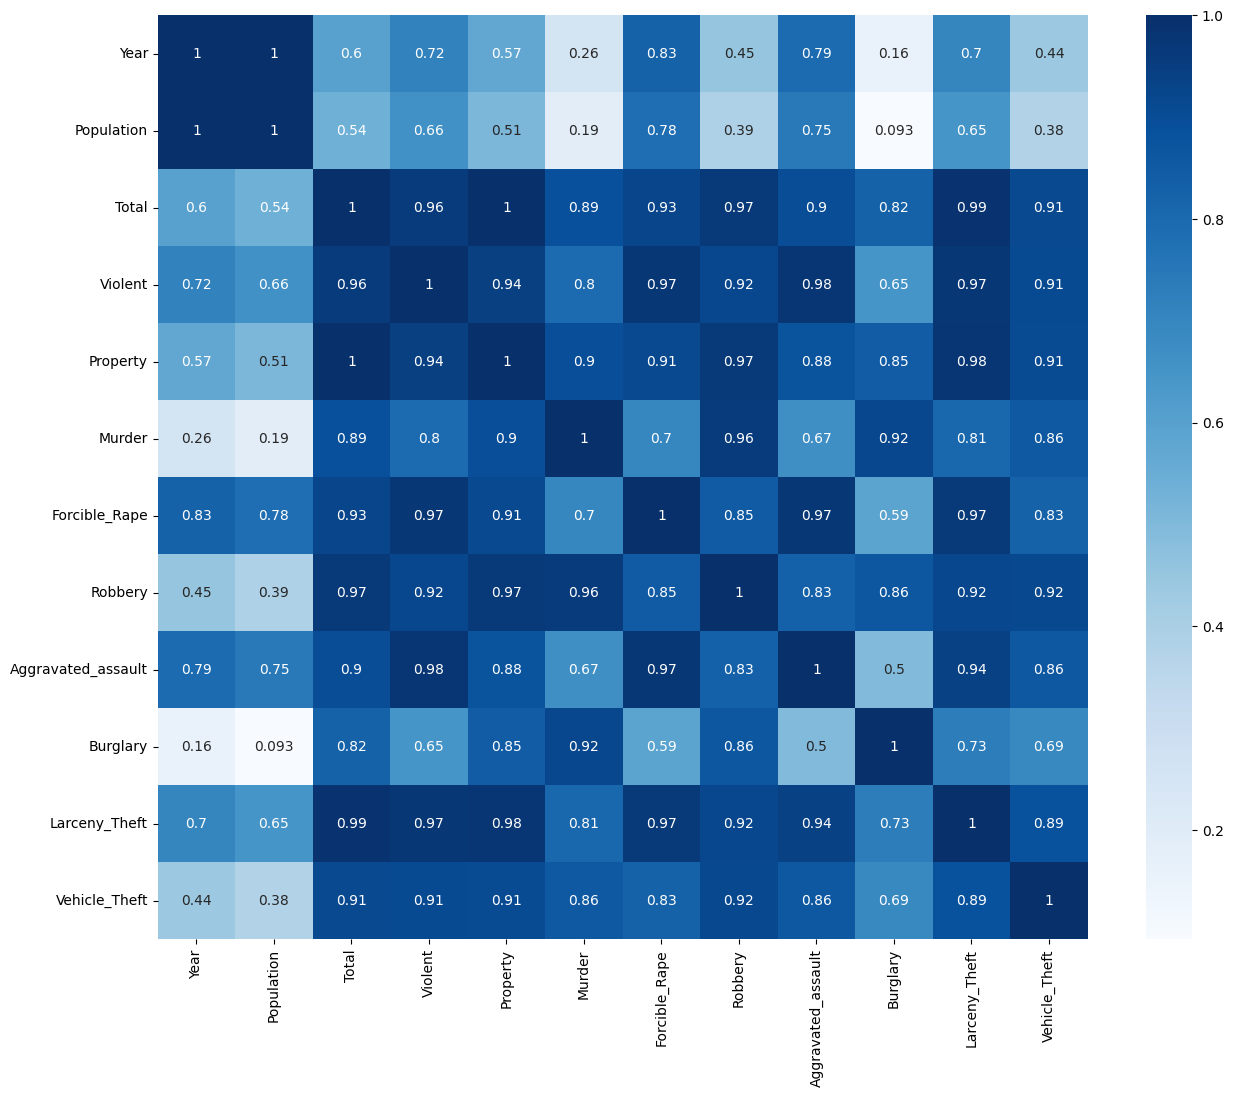

In [67]:
corr = crime_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cbar=True, annot=True, annot_kws={'size':10}, cmap='Blues')

Looking at correlations there a lot of parameters having really high correlations, like Murders with Burglary, Rape with assault etc.

In [68]:
X = crime_df.Year.values.reshape(-1,1)[:1000]
y = crime_df.Robbery.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:

model.fit(X, y)

LinearRegression()

Model Score:0.20340210937079062
Model intercept:-8002265.678138532
Model coefficient:[4236.89761905]
Mean error: 17716591843.673935


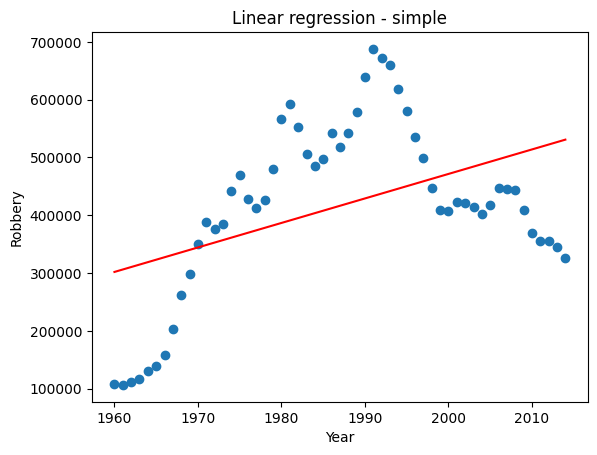

In [69]:
print(f'Model Score:{model.score(X, y)}')
print(f'Model intercept:{model.intercept_}')
print(f'Model coefficient:{model.coef_}')

prediction = model.predict(X)
error = mean_squared_error(y, prediction)
print(f'Mean error: {error}')

plt.xlabel('Year')
plt.ylabel('Robbery')
plt.title('Linear regression - simple')
plt.scatter(X, y)
plt.plot(X, prediction, color='r')

I'm showing now the chart that demonstrates count of Robbery by the year. Linear regression for this type of analysis are not efficient. Red line is showing as it's supposed number to growth with the time passed

In [54]:
def PolynomRegres(X, y, ylabel):
    fig, axes = plt.subplots(4, 2, figsize=(16, 18))
    x_axes = 0
    errors = []

    for order in range(1,9):

        poly = PolynomialFeatures(order, include_bias = False)
        X_order = poly.fit_transform(X)

        #Your code:
        model.fit(X_order, y)
        X_new = np.arange(X.min(), X.max(), 1).reshape(-1,1)
        prediction = model.predict(poly.fit_transform(X_new))
        y_axes = (order + 1) % 2


        axes[x_axes][y_axes].ticklabel_format(axis="y", style='plain')
        axes[x_axes][y_axes].set_xlabel('Year')
        axes[x_axes][y_axes].set_ylabel(f'{ylabel}')
        axes[x_axes][y_axes].set_title(f'Degree {order}')
        axes[x_axes][y_axes].scatter(X, y, c='b')
        axes[x_axes][y_axes].plot(X_new, prediction, c='r')

        x_axes = x_axes + 1 if (order + 1) % 2 else x_axes
        error = mean_squared_error(y, model.predict(X_order))
        errors.append(error)

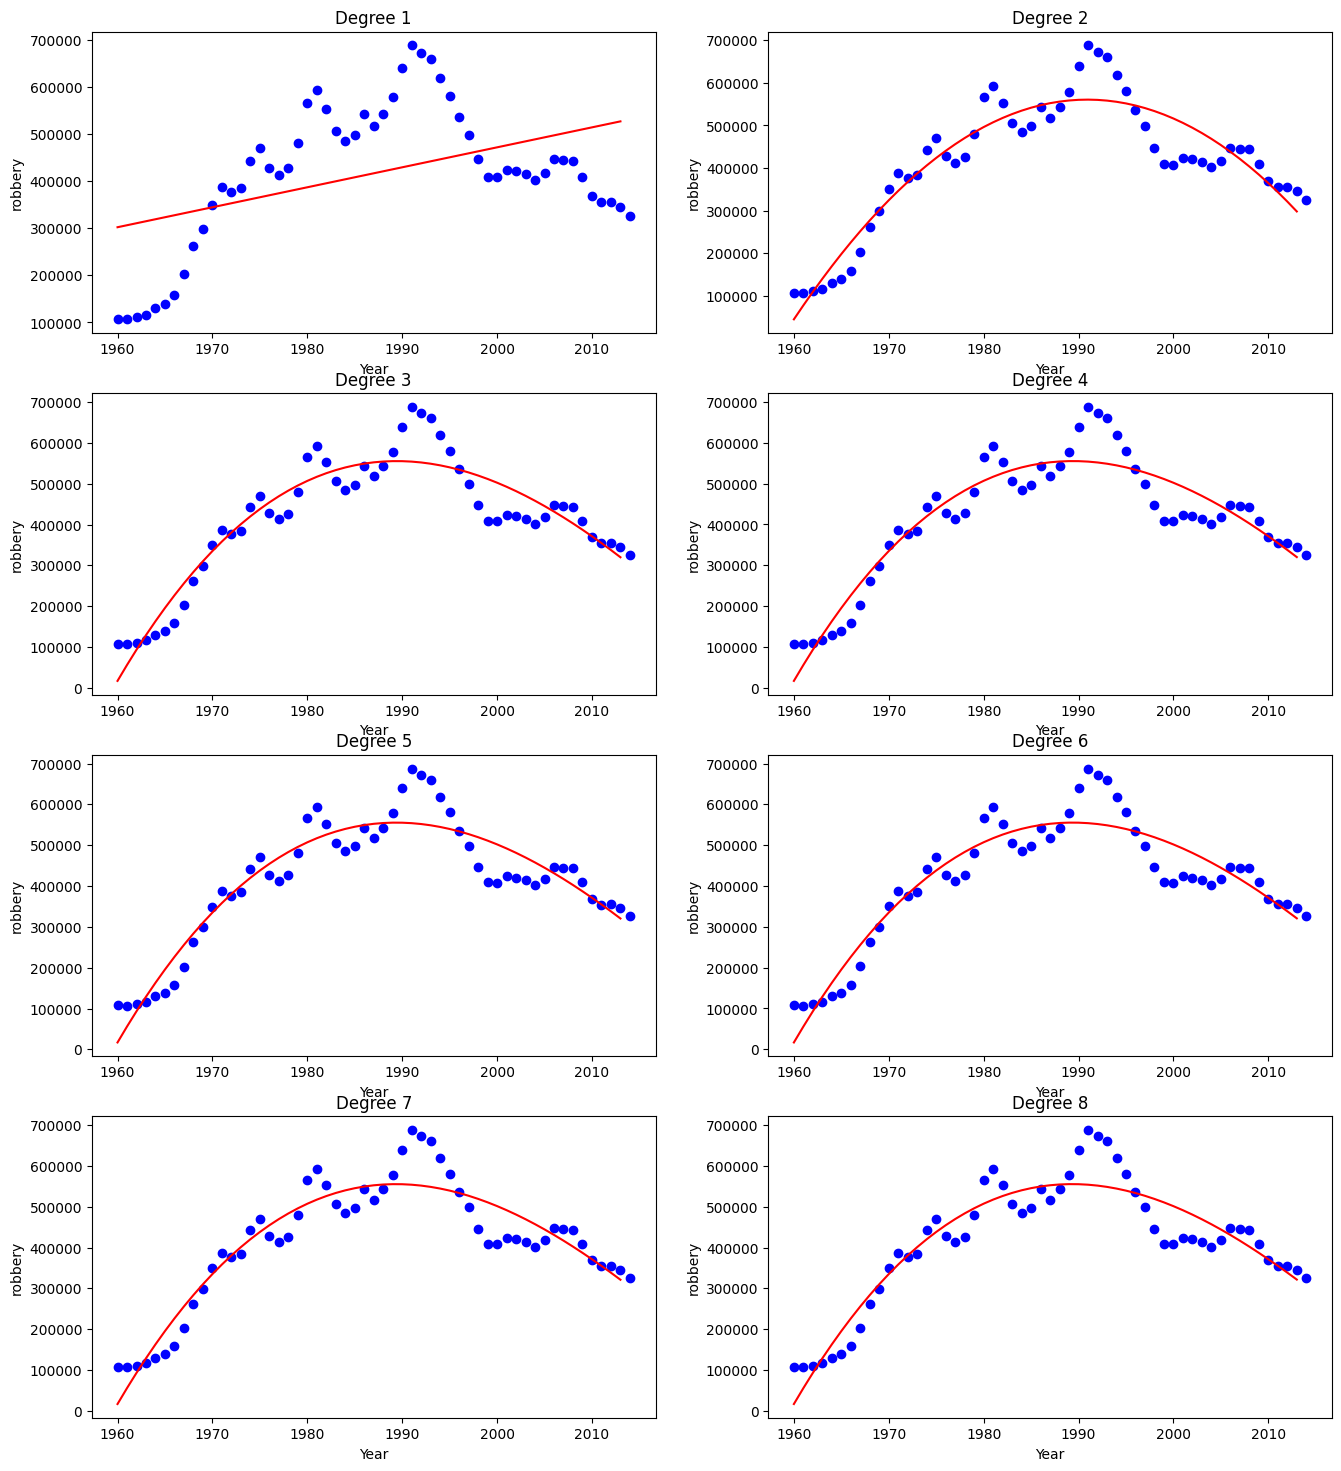

In [55]:
PolynomRegres(X, y, 'robbery')

Better looking charts now, I've applied Polynomial Regression that describe the relationship between the independent variable x and the dependent variable y using a nth-degree polynomial in x.

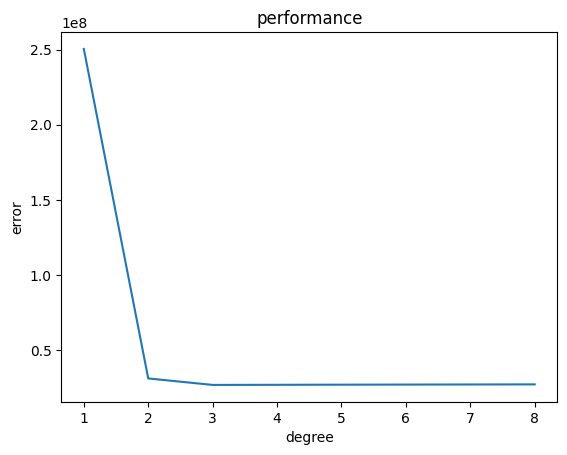

In [56]:
plt.xlabel('degree')
plt.ylabel('error')
plt.title('performance')
plt.plot([x for x in range(1, 9)], errors)

In this case on the second degree of x we get a really nice small error. We are not observing any characteristics of high-degree polynomials.

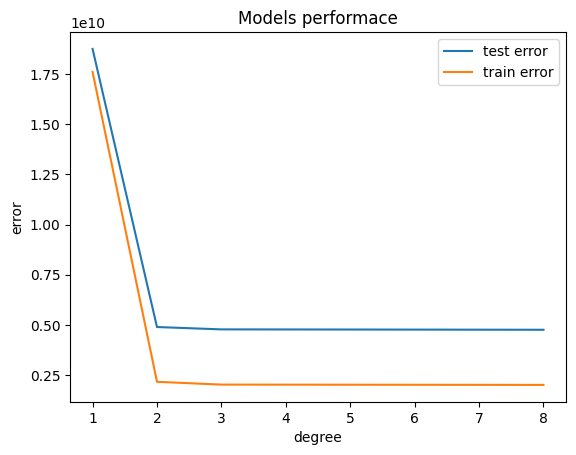

In [57]:
test_err = []
train_err = []

for order in range(1,9):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

    poly = PolynomialFeatures(order, include_bias = False)
    X_order_train = poly.fit_transform(X_train)
    X_order_test = poly.fit_transform(X_test)
    model.fit(X_order_train, y_train)
    error = mean_squared_error(y_train, model.predict(X_order_train))
    train_err.append(error)
    error = mean_squared_error(y_test, model.predict(X_order_test))
    test_err.append(error)


plt.xlabel('degree')
plt.ylabel('error')
plt.title('Models performace')
plt.plot([x for x in range(1, 9)], test_err, label='test error')
plt.plot([x for x in range(1, 9)], train_err, label='train error')
plt.legend()

Also in this case splitting on test and train data we can observe not much difference in behavior of the errors but train error seems to have slighter lower error.

In [58]:
X = crime_df.Year.values.reshape(-1,1)[:1000]
y = crime_df.Forcible_Rape.values.reshape(-1)[:1000]

model = LinearRegression()

model.fit(X, y)

LinearRegression()

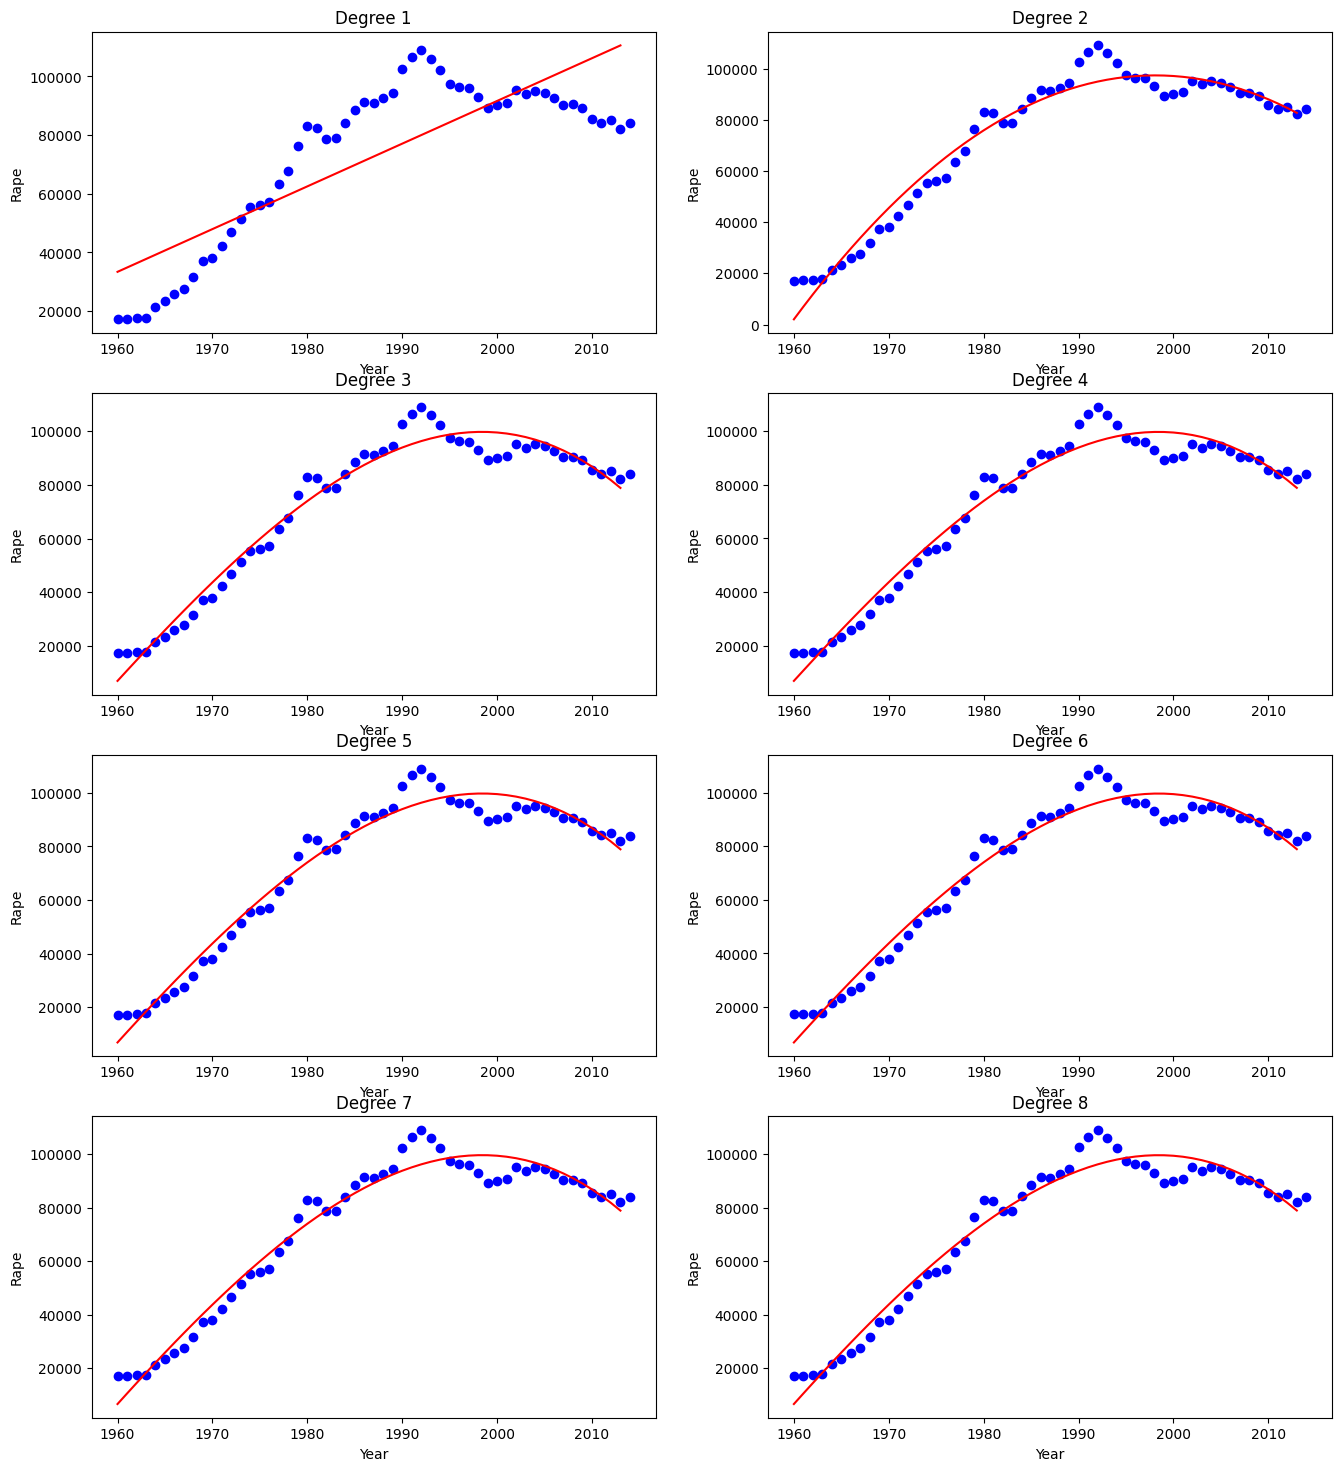

In [59]:
PolynomRegres(X, y, 'Rape')


I would like also to see result of Polynomial Regression on other parameters of dataset. I've choosen `Rapes` and we can see by the charts that we get really similar results as Robbery. The degree of 2 and above seems to have similar results.

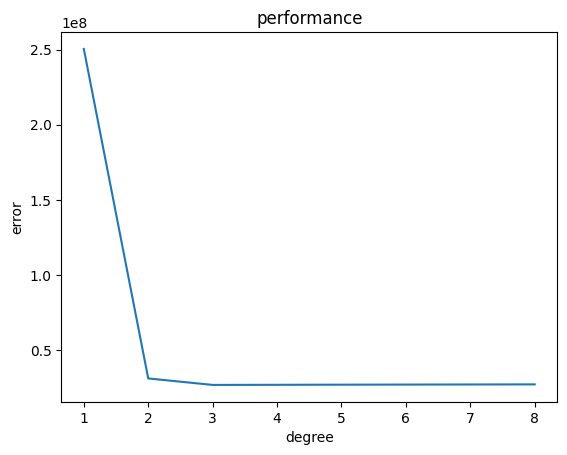

In [60]:
plt.xlabel('degree')
plt.ylabel('error')
plt.title('performance')
plt.plot([x for x in range(1, 9)], errors)

In [61]:
X = crime_df.Year.values.reshape(-1,1)[:1000]
y = crime_df.Burglary.values.reshape(-1)[:1000]

model = LinearRegression()

model.fit(X, y)

LinearRegression()

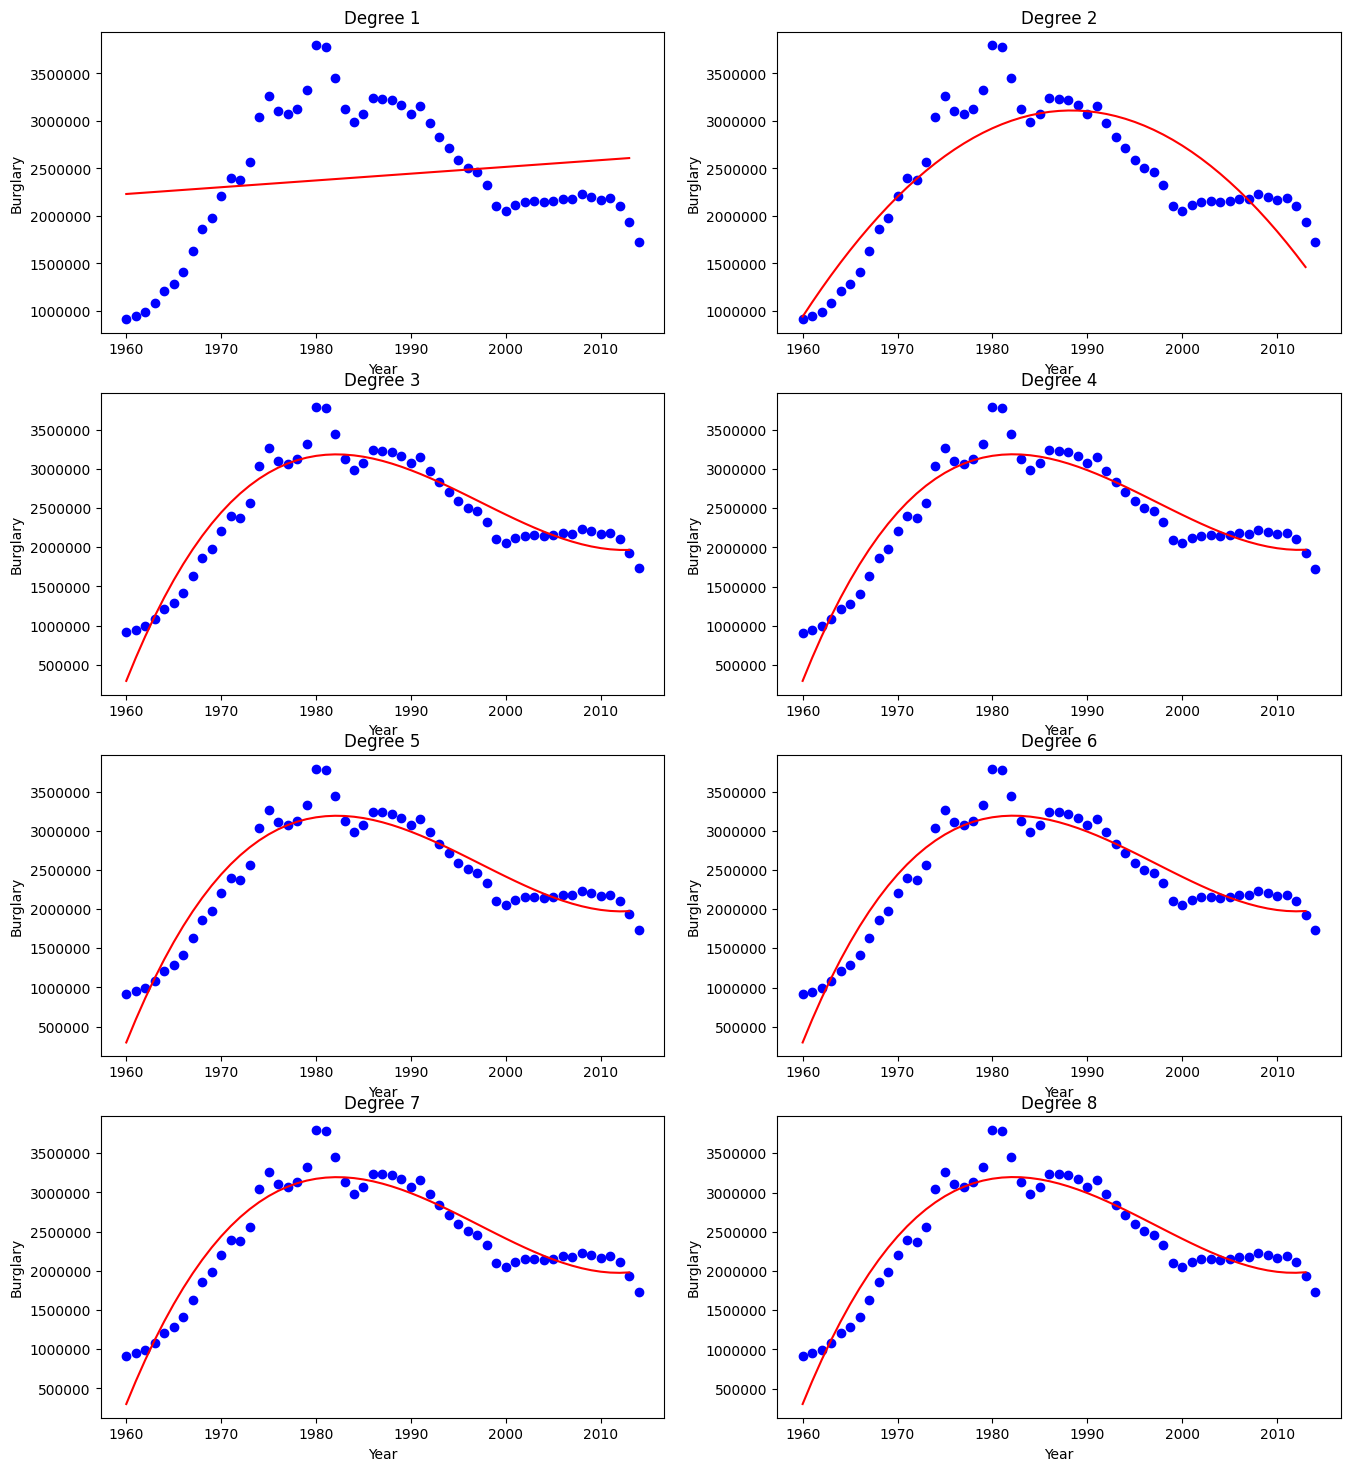

In [62]:
PolynomRegres(X, y, 'Burglary')

We can see that Burglary is the most common crime that is appearing in USA, I think it's pretty clear why, because there are lighter punishments in case of getting caught and getting bring to court.

We can observe that for the most appearing crimes were between 1980-1990, when USA reached the highest percentege of unemployment since WW II and was strugling with budget deficit. There are no obstacles that with this condtions crime rate reached so high at that time.